In [1]:
import requests

# 다운로드할 URL
train_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt"
test_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt"

# 파일 다운로드 및 저장 함수
def download_file(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as file:
        file.write(response.content)

# 파일 다운로드
download_file(train_url, "../data/ratings_train.txt")
download_file(test_url, "../data/ratings_test.txt")

In [2]:
import pandas as pd
train = pd.read_table('../data/ratings_train.txt', sep = '\t')
train = train.drop(columns=['id'])
test = pd.read_table('../data/ratings_test.txt', sep = '\t')
test = test.drop(columns=['id'])

In [3]:
print(train.isna().sum())
print(test.isna().sum())
print("-"*15)
train = train.dropna(how='any')
test = test.dropna(how='any')

print(train.isna().sum())
print(test.isna().sum())

document    5
label       0
dtype: int64
document    3
label       0
dtype: int64
---------------
document    0
label       0
dtype: int64
document    0
label       0
dtype: int64


In [4]:
print(len(train), len(test))
total_sentences = list(train['document']) + list(test['document'])

149995 49997


In [5]:
with open('./_8.naver_review.txt', 'w', encoding='utf-8') as f:
    # 훈련 데이터의 'document' 열에 있는 각 문장에 대해 반복
    for line in total_sentences:
        try:
            # 문장을 파일에 쓰고 새로운 줄 추가
            f.write(line + '\n')
        except:
            # 쓰기 오류 발생 시 오류 메시지와 해당 문장 출력
            print("write error ---> ", line)

In [6]:
# 입력 파일 경로 설정
input_file = '_8.naver_review.txt'

# 어휘 사전의 최대 크기 설정
vocab_size = 30000

# 모델 파일의 접두사 설정
prefix = '_8.naver_review'

# 명령어 템플릿 정의
templates = '--input={} --model_prefix={} --vocab_size={}'

# 템플릿에 변수 값을 포맷하여 명령어 문자열 생성
cmd = templates.format(input_file, prefix, vocab_size)

# 생성된 명령어 출력
print(cmd)

--input=_8.naver_review.txt --model_prefix=_8.naver_review --vocab_size=30000


In [7]:
import sentencepiece as spm
spm.SentencePieceTrainer.Train(cmd)
# SentencePieceProcessor 객체 생성
sp = spm.SentencePieceProcessor()

# 학습된 SentencePiece 모델 로드
sp.Load('{}.model'.format(prefix))

sentencepiece_trainer.cc(178) LOG(INFO) Running command: --input=_8.naver_review.txt --model_prefix=_8.naver_review --vocab_size=30000
sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: _8.naver_review.txt
  input_format: 
  model_prefix: _8.naver_review
  model_type: UNIGRAM
  vocab_size: 30000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_i

True

trainer.cc(618) LOG(INFO) EM sub_iter=1 size=134192 obj=14.3169 num_tokens=1116436 num_tokens/piece=8.31969
unigram_model_trainer.cc(618) LOG(INFO) EM sub_iter=0 size=100638 obj=14.5315 num_tokens=1170137 num_tokens/piece=11.6272
unigram_model_trainer.cc(618) LOG(INFO) EM sub_iter=1 size=100621 obj=14.4751 num_tokens=1170213 num_tokens/piece=11.6299
unigram_model_trainer.cc(618) LOG(INFO) EM sub_iter=0 size=75465 obj=14.7153 num_tokens=1222428 num_tokens/piece=16.1986
unigram_model_trainer.cc(618) LOG(INFO) EM sub_iter=1 size=75465 obj=14.6577 num_tokens=1222420 num_tokens/piece=16.1985
unigram_model_trainer.cc(618) LOG(INFO) EM sub_iter=0 size=56598 obj=14.9221 num_tokens=1277050 num_tokens/piece=22.5635
unigram_model_trainer.cc(618) LOG(INFO) EM sub_iter=1 size=56597 obj=14.8636 num_tokens=1277082 num_tokens/piece=22.5645
unigram_model_trainer.cc(618) LOG(INFO) EM sub_iter=0 size=42447 obj=15.1556 num_tokens=1332335 num_tokens/piece=31.3882
unigram_model_trainer.cc(618) LOG(INFO) EM 

In [8]:
# 훈련 데이터의 'document' 열에 있는 첫 세 개의 문장에 대해 반복
for t in total_sentences[:3]:
    # 원본 문장 출력
    print(t)
    # 문장을 SentencePiece 모델을 사용하여 토큰화하여 출력
    print(sp.encode_as_pieces(t))
    # 문장을 SentencePiece 모델을 사용하여 인덱스 시퀀스로 변환하여 출력
    print(sp.encode_as_ids(t), '\n')

아 더빙.. 진짜 짜증나네요 목소리
['▁아', '▁더빙', '..', '▁진짜', '▁짜증나네요', '▁목소리']
[53, 913, 5, 25, 15810, 1288] 

흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
['▁흠', '...', '포스터', '보고', '▁초딩영화', '줄', '....', '오버', '연기', '조차', '▁가볍지', '▁않', '구나']
[1372, 6, 5352, 166, 17944, 449, 47, 14903, 417, 1205, 7360, 953, 414] 

너무재밓었다그래서보는것을추천한다
['▁너무', '재', '밓', '었다', '그래서', '보는것', '을', '추천', '한다']
[17, 667, 24910, 597, 2659, 12637, 15, 2229, 301] 



In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow import keras
total_sentences = [sp.encode_as_ids(sentence) for sentence in total_sentences]
max_len = 28
padding = 'post'
truncating = 'post'
padded = pad_sequences(total_sentences, maxlen=max_len, padding=padding, truncating=truncating)
train_sentences = padded[:len(train)]
test_sentences = padded[len(train):]

2024-11-14 18:02:07.635670: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-14 18:02:07.986212: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-14 18:02:09.113310: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
import numpy as np
X_train = np.array(train_sentences)
y_train = np.array(train['label'])
X_test = np.array(test_sentences)
y_test = np.array(test['label'])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

# Train, validation, test dataset 생성 및 배치 단위로 분리
batch_size = 128

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

2024-11-14 18:02:14.514665: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:c4:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-14 18:02:14.694593: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:c4:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-14 18:02:14.694644: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:c4:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-14 18:02:14.699995: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:c4:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-14 18:02:14.700045: I tensorflow/compile

In [12]:
from tensorflow.keras import layers, models
import tensorflow as tf

# return_sequence = false, return_state = false
def rnn_model(vocab_size, dim_lst, loss_fn, optimizer, metrics):
    # 입력 레이어
    inputs = layers.Input(shape=(None,), dtype="int32")  # 입력의 모양을 지정 (단어 인덱스 시퀀스)
    x = layers.Embedding(vocab_size + 1, dim_lst[0])(inputs)  # 어휘 크기 + 1, 임베딩 차원 64
    x = layers.LSTM(dim_lst[1])(x)
    x = layers.Dense(dim_lst[2], activation='relu')(x)
    outputs = layers.Dense(dim_lst[3], activation='sigmoid')(x)
    model = models.Model(inputs, outputs)
    model.compile(loss=loss_fn, optimizer=optimizer, metrics=metrics)
    return model

# 모델 생성
vocab_size = vocab_size  # 예시로 어휘 크기 설정
dim_lst = [128, 128, 64, 1]
loss_fn = 'binary_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']
model = rnn_model(
    vocab_size=vocab_size, dim_lst=dim_lst, loss_fn=loss_fn, optimizer=optimizer, metrics=metrics
)

# 모델 요약 출력
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         3840128   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3980033 (15.18 MB)
Trainable params: 3980033 (15.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
import time
# 모델 학습 시간 측정
start_time = time.time()

# 모델 학습 (검증 데이터 포함)
epochs = 2
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, verbose=1)

# 모델 테스트 평가
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
end_time = time.time()
evaluation_time = end_time - start_time
print(f"Evaluation Time: {evaluation_time:.2f} seconds")

Epoch 1/2
938/938 [==============================] - 44s 47ms/step - loss: 0.4073 - accuracy: 0.8083 - val_loss: 0.3487 - val_accuracy: 0.8468
Epoch 2/2
391/391 [==============================] - 2s 5ms/step - loss: 0.4185 - accuracy: 0.8438
Test Loss: 0.4185, Test Accuracy: 0.8438
Evaluation Time: 57.48 seconds


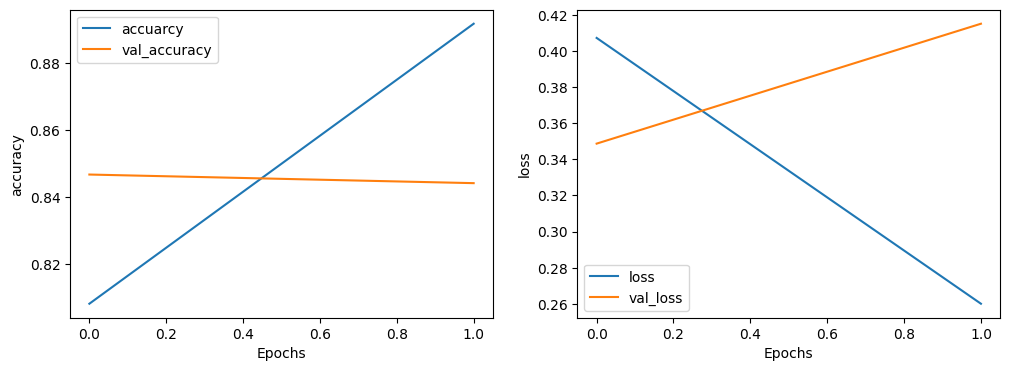

In [15]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_xlabel('Epochs')
ax1.set_ylabel('accuracy')
ax1.legend(['accuarcy', 'val_accuracy'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_xlabel('Epochs')
ax2.set_ylabel('loss')
ax2.legend(['loss', 'val_loss'])
plt.show()